# Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# training data set

In [10]:
traindata = pd.read_table('train_FD004.txt',sep=' ',header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN


In [11]:
traindata.shape

(61249, 28)

# RUL 

In [12]:
rul_given = pd.read_table('RUL_FD004.txt',sep=' ',header=None)
rul_given.head()

,0,1
0,22,NaN
1,39,NaN
2,107,NaN
3,75,NaN
4,149,NaN


# data pre-processing 

In [13]:
def preproc(df,key):
    
    # data preprocessing
    sensordata = df.drop([0,1,2,3,4,26,27],axis=1)
    cols = range(1,22)
    sensordata.columns = cols
    X = sensordata.drop([1,5,6,10,16,18,19],axis=1)
    
    # RUL creation
    g = df.groupby([0])
    d = (g.last()).sort_index().reset_index().drop_duplicates()
    d.drop(d.columns.difference([1]),axis=1,inplace=True)
    RUL_set = 115
    RUL = []
    
    if(key=='test'):
        rul_given = pd.read_table('RUL_FD004.txt',sep=' ',header=None)
        d[1] = d[1]+rul_given[0]
    
    for row in range(df.shape[0]):
        i = df[0][row] - 1
        if df[1][row] <= (d[1][i] - RUL_set):
            RUL.append(RUL_set)
        else:
            RUL.append(d[1][i] - df[1][row])
    RUL = np.asarray(RUL)  
    
    return X, RUL

In [14]:
X_train, Y_train = preproc(traindata,'train')
X_train.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,549.68,1343.43,1112.93,137.36,2211.86,8311.32,41.69,129.78,2387.99,8074.83,9.3335,330,10.62,6.3670
1,606.07,1477.61,1237.50,332.10,2323.66,8713.60,43.94,312.59,2387.73,8046.13,9.1913,361,24.37,14.6552
2,548.95,1343.12,1117.05,138.18,2211.92,8306.69,41.66,129.62,2387.97,8066.62,9.4007,329,10.48,6.4213
3,548.70,1341.24,1118.03,137.98,2211.88,8312.35,41.68,129.80,2388.02,8076.05,9.3369,328,10.54,6.4176
4,536.10,1255.23,1033.59,174.82,1915.22,7994.94,36.48,164.11,2028.08,7865.80,10.8366,305,14.03,8.6754


In [15]:
Y_train

array([115, 115, 115, ...,   2,   1,   0])

In [16]:
print("X_train shape: ",X_train.shape)
print("Y_train shape: ",Y_train.shape)

X_train shape:  (61249, 14)
Y_train shape:  (61249,)


# test data

In [17]:
testdata = pd.read_table('test_FD004.txt',sep=' ',header=None)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,NaN,NaN
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,NaN,NaN
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,NaN,NaN
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,NaN,NaN
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,NaN,NaN


In [18]:
testdata.shape

(41214, 28)

In [19]:
X_test, Y_test = preproc(testdata,'test')
X_test.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,606.67,1481.04,1227.81,332.52,2323.67,8704.98,43.83,313.03,2387.78,8048.98,9.2229,362,24.31,14.7007
1,536.22,1256.17,1031.48,174.46,1915.21,7999.94,36.11,163.61,2028.09,7863.46,10.8632,306,14.36,8.5748
2,549.23,1340.13,1105.88,137.34,2211.93,8305.38,41.52,129.98,2387.95,8071.13,9.3960,328,10.39,6.4365
3,549.19,1339.70,1107.26,137.23,2211.89,8301.00,41.73,129.48,2387.90,8078.89,9.3594,328,10.56,6.2367
4,555.10,1353.04,1117.80,192.94,2222.71,8331.05,41.32,181.82,2387.87,8057.83,9.3030,333,14.85,8.9326


In [20]:
Y_test

array([115, 115, 115, ...,  28,  27,  26])

In [21]:
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_test shape:  (41214, 14)
Y_test shape:  (41214,)


# Plotting piecewise function

Text(0.5, 1.0, 'Training turbine 1')

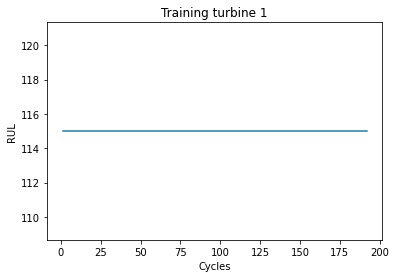

In [22]:
#on y_train

plt.plot(range(1,193),Y_train[0:192])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Training turbine 1')

Text(0.5, 1.0, 'Testing turbine 1')

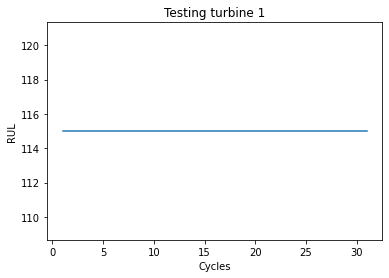

In [23]:
#on y_test

plt.plot(range(1,32),Y_test[0:31])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Testing turbine 1')

In [24]:
#X1, y1 = shuffle(X_train,Y_train, random_state=23)
X1, y1 = X_train, Y_train

In [25]:
from sklearn.preprocessing import MinMaxScaler
normaliser = MinMaxScaler(feature_range = (-1,1))
X1 = normaliser.fit_transform(X1)
X_test = normaliser.transform(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Conv1D, Flatten

def crt_model(activation):
    model = Sequential()
    model.add(Dense(650,input_dim=14, activation=activation,  kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(650, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(450, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(350, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[keras.metrics.RootMeanSquaredError()])
    return model

In [27]:
reg = KerasRegressor(build_fn=crt_model, verbose=1, epochs=5000, activation='tanh', batch_size=512)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [28]:
history = reg.fit(X1, y1)

Streaming output truncated to the last 5000 lines.
120/120 [==============================] - 1s 5ms/step - loss: 337.2408 - root_mean_squared_error: 17.3670
Epoch 2502/5000
120/120 [==============================] - 1s 6ms/step - loss: 338.4788 - root_mean_squared_error: 17.4038
Epoch 2503/5000
120/120 [==============================] - 1s 6ms/step - loss: 338.5664 - root_mean_squared_error: 17.4060
Epoch 2504/5000
120/120 [==============================] - 1s 5ms/step - loss: 340.7450 - root_mean_squared_error: 17.4683
Epoch 2505/5000
120/120 [==============================] - 1s 5ms/step - loss: 338.1686 - root_mean_squared_error: 17.3949
Epoch 2506/5000
120/120 [==============================] - 1s 5ms/step - loss: 339.1664 - root_mean_squared_error: 17.4242
Epoch 2507/5000
120/120 [==============================] - 1s 5ms/step - loss: 339.3252 - root_mean_squared_error: 17.4280
Epoch 2508/5000
120/120 [==============================] - 1s 5ms/step - loss: 340.2755 - root_mean_squa

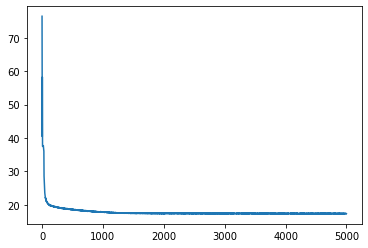

In [29]:
plt.plot(history.history['root_mean_squared_error'])
plt.show()

In [30]:
result = reg.predict(X_test)

81/81 [==============================] - 0s 2ms/step


In [31]:
result = np.ravel(result)

In [32]:
print('RMSE: ',np.sqrt(mean_squared_error(result,Y_test)))

RMSE:  14.349448380384281


In [33]:
def plotfun(testdata, result, Y_test, x, pval):
    g2 = testdata.groupby([0])
    d2 = (g2.last()).sort_index().reset_index().drop_duplicates()
    
    low=0
    for i in range(x):
        if(i==x-1):
            high=d2.iloc[i][1]
        else:
            low+=d2.iloc[i][1]    
    
    if(pval):
        print('Lower Limit: ',low)
        print('Upper Limit: ',low + high)
        print('Cycles:',high)
        
    low = int(low)
    high=int(high)
    
    fig=plt.figure(figsize=[10,5])
    plt.plot(range(1,int(high)+1),Y_test[low:low+high])
    plt.plot(range(1,int(high)+1),result[low:low+high])
    plt.ylim([0,150])
    plt.xlabel('Cycles')
    plt.ylabel('RUL')
    plt.title('Testing turbine ' + str(x))
    plt.legend(['Actual','Predicted'])

Lower Limit:  2219.0
Upper Limit:  2387.0
Cycles: 168.0


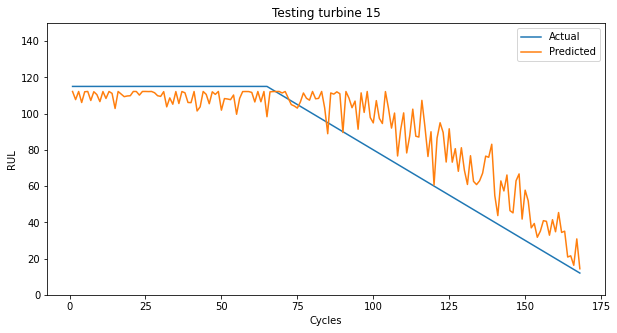

In [36]:
plotfun(testdata, result, Y_test, 15, True)

Text(0.5, 1.0, 'Testing turbine 3 - RUL Deviation')

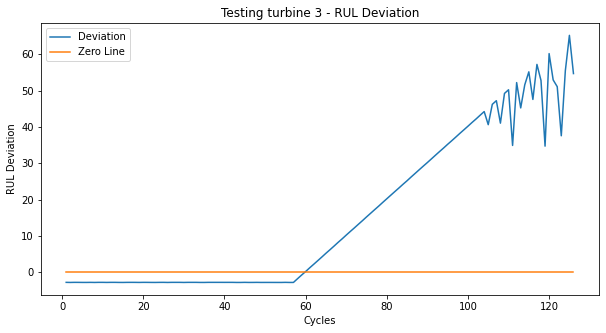

In [35]:
fig=plt.figure(figsize=[10,5])
plt.plot(range(1,127),(result[80:206]-Y_test[80:206]))
plt.plot(range(1,127),np.zeros((126)))
plt.xlabel('Cycles')
plt.ylabel('RUL Deviation')
plt.legend(['Deviation','Zero Line'])
plt.title('Testing turbine 3 - RUL Deviation')